In [1]:
from langgraph.types import Command
import os
os.chdir("../")

In [2]:
from interviewBot.graph import build_graph, build_workflow

In [3]:
wf = build_workflow()
compiled_wf = wf.compile()

In [4]:
print("Nodes:", compiled_wf.nodes.keys())

Nodes: dict_keys(['__start__', 'init_sess_node', 'user_verify_interrupt_node', 'user_verify_node'])


In [5]:
print(compiled_wf.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	init_sess_node(init_sess_node)
	user_verify_interrupt_node(user_verify_interrupt_node)
	user_verify_node(user_verify_node)
	__end__([<p>__end__</p>]):::last
	__start__ --> init_sess_node;
	init_sess_node --> user_verify_interrupt_node;
	user_verify_interrupt_node --> user_verify_node;
	user_verify_node --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [6]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

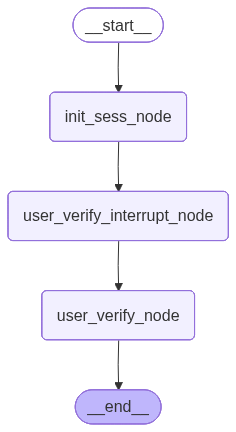

In [7]:
display(
    Image(
        compiled_wf.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [8]:
compiled = await build_graph()
result = await compiled.ainvoke({}, config={"configurable": {"thread_id": 5}})
print(result)

{'user_id': None, 'verified': None, 'verification_count': 0, 'difficulty': 5, 'question_count': 0, 'scores': [], 'difficulties': [5], 'clarification_needed': False, 'clarifications_used': 0, 'answers_log': [], 'final_decision': None, '__interrupt__': [Interrupt(value={'message': 'Please enter your Email ID or Employee ID for verification (You will have 2 tries):', 'interrupt_type': 'verification', 'field': 'user_id'}, id='f267ecc3be09accca1bed357acd34aa6')]}


In [9]:
result

{'user_id': None,
 'verified': None,
 'verification_count': 0,
 'difficulty': 5,
 'question_count': 0,
 'scores': [],
 'difficulties': [5],
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'final_decision': None,
 '__interrupt__': [Interrupt(value={'message': 'Please enter your Email ID or Employee ID for verification (You will have 2 tries):', 'interrupt_type': 'verification', 'field': 'user_id'}, id='f267ecc3be09accca1bed357acd34aa6')]}

In [10]:
result = await compiled.ainvoke(
    Command(resume = "rahulrawat272chd@gmail.com"), 
    config = {"configurable": {"thread_id": 5}}
)


In [11]:
result

{'user_id': 'rahulrawat272chd@gmail.com',
 'verified': True,
 'verification_count': 1,
 'difficulty': 5,
 'question_count': 0,
 'scores': [],
 'difficulties': [5],
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'final_decision': None}